In [1]:
from tensorflow.keras.layers import Dense,Dropout,Input,MaxPooling2D,ZeroPadding2D,Conv2D,Flatten
from keras.models import Sequential
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam,SGD
from keras.preprocessing.image import img_to_array,load_img,ImageDataGenerator
from keras.utils import to_categorical
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
import pandas as pd
TRAIN_IMG_PATH = "./train/"
TEST_IMG_PATH = "./test/"
LABELS_CSV_PATH = "./labels.csv"
SAMPLE_SUB_PATH = "./sample_submission.csv"

In [3]:
df1 = pd.read_csv(LABELS_CSV_PATH)

In [4]:
dog_breeds = ["beagle", "chihuahua", "doberman", "french_bulldog", "golden_retriever", "malamute", "pug", "saint_bernard", "scottish_deerhound", "tibetan_mastiff"]

Adding image path column

In [5]:

df=df1.assign(img_path=lambda x: TRAIN_IMG_PATH + x['id'] +'.jpg')
df

,id,breed,img_path
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,./train/000bec180eb18c7604dcecc8fe0dba07.jpg
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,./train/001513dfcb2ffafc82cccf4d8bbaba97.jpg
2,001cdf01b096e06d78e9e5112d419397,pekinese,./train/001cdf01b096e06d78e9e5112d419397.jpg
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,./train/00214f311d5d2247d5dfe4fe24b2303d.jpg
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,./train/0021f9ceb3235effd7fcde7f7538ed62.jpg
...,...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi,./train/ffd25009d635cfd16e793503ac5edef0.jpg
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont,./train/ffd3f636f7f379c51ba3648a9ff8254f.jpg
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale,./train/ffe2ca6c940cddfee68fa3cc6c63213f.jpg
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher,./train/ffe5f6d8e2bff356e9482a80a6e29aac.jpg


Selecting only 10 breeds

In [6]:
for i in range(len(df)):
    if df['breed'][i] not in dog_breeds:
        df.drop(i, inplace=True)

In [7]:
df

,id,breed,img_path
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,./train/0021f9ceb3235effd7fcde7f7538ed62.jpg
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound,./train/0042188c895a2f14ef64a918ed9c7b64.jpg
20,008b1271ed1addaccf93783b39deab45,doberman,./train/008b1271ed1addaccf93783b39deab45.jpg
25,00a366d4b4a9bbb6c8a63126697b7656,golden_retriever,./train/00a366d4b4a9bbb6c8a63126697b7656.jpg
37,0100f55e4f0fe28f2c0465d3fc4b9897,golden_retriever,./train/0100f55e4f0fe28f2c0465d3fc4b9897.jpg
...,...,...,...
10158,fe50bac6c389d137ea01c9cfc7346ca8,scottish_deerhound,./train/fe50bac6c389d137ea01c9cfc7346ca8.jpg
10161,fe624532170510bd80627c0500bafc97,tibetan_mastiff,./train/fe624532170510bd80627c0500bafc97.jpg
10170,feb16cf86c9dac6d476e3c372ba5c279,pug,./train/feb16cf86c9dac6d476e3c372ba5c279.jpg
10172,febcab8eb2da444bf83336cffec7eb92,golden_retriever,./train/febcab8eb2da444bf83336cffec7eb92.jpg


##Deleting Extra(120 - 10) dog breeds

In [ ]:
dframe = df.reset_index()
id_list = dframe['id'] + '.jpg'
id_list = id_list.tolist()
all_files = os.listdir(TRAIN_IMG_PATH)
del_files = []
for i in all_files:
    if i not in id_list:
        del_files.append(i)
        
for j in range(len(del_files)):
    
    os.remove(TRAIN_IMG_PATH + del_files[j])

Select dogs from each breeds and moving the image to the breed folder

In [ ]:
import os
import shutil
for b in dog_breeds:
    if os.path.isdir('train/' + b) is False:
        os.mkdir('train/' + b)
        
        
for c in range(len(dframe)):
    if dframe['breed'][c] in dog_breeds:
        shutil.move(dframe['img_path'][c], 'train/' + dframe["breed"][c])

In [ ]:
if os.path.isdir('valid/') is False:
        os.mkdir('valid/')
for b in dog_breeds:
    if os.path.isdir('valid/' + b) is False:
        os.mkdir('valid/' + b)

In [ ]:
import random, glob

for dir in os.listdir("train"):
    pp = os.getcwd() + '\\' + "train\\" + dir
    for i in random.sample(os.listdir(os.getcwd() + '\\' + "train\\" + dir), 25):
      
        shutil.move(pp + "\\" + i, "valid/" + dir)

In [8]:
# for test
testdf = pd.read_csv(SAMPLE_SUB_PATH)
testdf

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10352,ffeda8623d4eee33c6d1156a2ecbfcf8,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
10353,fff1ec9e6e413275984966f745a313b0,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
10354,fff74b59b758bbbf13a5793182a9bbe4,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
10355,fff7d50d848e8014ac1e9172dc6762a3,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


In [9]:
testdf = testdf[['id'] + dog_breeds]
testdf

,id,beagle,chihuahua,doberman,french_bulldog,golden_retriever,malamute,pug,saint_bernard,scottish_deerhound,tibetan_mastiff
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
...,...,...,...,...,...,...,...,...,...,...,...
10352,ffeda8623d4eee33c6d1156a2ecbfcf8,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
10353,fff1ec9e6e413275984966f745a313b0,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
10354,fff74b59b758bbbf13a5793182a9bbe4,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
10355,fff7d50d848e8014ac1e9172dc6762a3,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


In [10]:
train_path = os.getcwd() + '\\' + "train"
valid_path = os.getcwd() + '\\' + "valid"
test_path = os.getcwd() + '\\' + "test"

In [11]:
test_path

'D:\\codes\\torch practice\\dog_classification\\test'

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [13]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes= dog_breeds, batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes= dog_breeds, batch_size=10)

Found 591 images belonging to 10 classes.
Found 250 images belonging to 10 classes.


As test label is not given move all file to same class i.e unknown

In [ ]:
if os.path.isdir('test/unknown') is False:
        os.mkdir('test/unknown/')
for i in os.listdir('test'):
  
    
    
    shutil.move(test_path + "\\" + i, test_path + "\\" + "unknown")

In [14]:
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes= None, class_mode= None, batch_size=10, shuffle=False)

Found 10357 images belonging to 1 classes.


In [15]:
imgs, labels = next(train_batches)


In [16]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

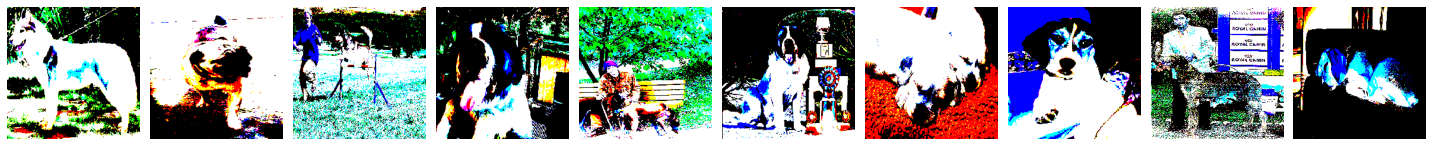

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [17]:
plotImages(imgs)
print(labels)

In [18]:
import tensorflow.keras as K

resnet50_model = tf.keras.applications.ResNet50(include_top=False, input_tensor=K.Input(shape=(224,224,3)))


In [19]:
resnet50_model.summary()


Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [20]:
for layer in resnet50_model.layers:
    layer.trainable = False

In [21]:

model = K.models.Sequential()
model.add(resnet50_model)
model.add(K.layers.Flatten())

model.add(K.layers.Dense(10, activation='softmax'))

In [22]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 10)                1003530   
Total params: 24,591,242
Trainable params: 1,003,530
Non-trainable params: 23,587,712
_________________________________________________________________


In [23]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [24]:
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=10,
          verbose=2
)

Epoch 1/10
60/60 - 16s - loss: 1.3635 - accuracy: 0.7022 - val_loss: 0.4933 - val_accuracy: 0.8520
Epoch 2/10
60/60 - 14s - loss: 0.0276 - accuracy: 0.9915 - val_loss: 0.3906 - val_accuracy: 0.8920
Epoch 3/10
60/60 - 14s - loss: 8.6169e-04 - accuracy: 1.0000 - val_loss: 0.3681 - val_accuracy: 0.8960
Epoch 4/10
60/60 - 14s - loss: 2.7768e-04 - accuracy: 1.0000 - val_loss: 0.3545 - val_accuracy: 0.9000
Epoch 5/10
60/60 - 14s - loss: 1.9608e-04 - accuracy: 1.0000 - val_loss: 0.3476 - val_accuracy: 0.9000
Epoch 6/10
60/60 - 14s - loss: 1.5932e-04 - accuracy: 1.0000 - val_loss: 0.3428 - val_accuracy: 0.8960
Epoch 7/10
60/60 - 14s - loss: 1.3442e-04 - accuracy: 1.0000 - val_loss: 0.3388 - val_accuracy: 0.9000
Epoch 8/10
60/60 - 14s - loss: 1.1616e-04 - accuracy: 1.0000 - val_loss: 0.3354 - val_accuracy: 0.9000
Epoch 9/10
60/60 - 14s - loss: 1.0250e-04 - accuracy: 1.0000 - val_loss: 0.3320 - val_accuracy: 0.9040
Epoch 10/10
60/60 - 14s - loss: 9.0737e-05 - accuracy: 1.0000 - val_loss: 0.3299 

In [26]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)


In [27]:
predictions[0]

array([7.3276853e-05, 8.8719168e-04, 4.5925869e-08, 4.3565320e-05,
       3.2899039e-05, 1.1664395e-03, 8.4807443e-06, 9.9759501e-01,
       5.1965451e-08, 1.9302528e-04], dtype=float32)

In [28]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [29]:
np.argmax(predictions[0], axis=-1)

7

Confusion matrix, without normalization
[[ 993 1311  698  402 1107 1200  647  800 2080 1119]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]


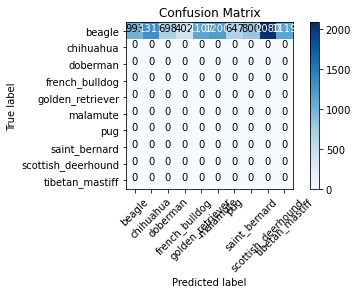

In [31]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot_labels = dog_breeds
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [37]:
from keras.preprocessing.image import img_to_array,load_img,ImageDataGenerator
im = img_to_array(load_img(os.getcwd() + "\\" + "ti2.jpg", target_size=(224, 224)))

im = np.expand_dims(im, axis=0)
im.shape

(1, 224, 224, 3)

In [49]:
pr = model.predict(im)
# pr = np.argmax(pr, axis=-1)
float(str(max(pr.tolist()[0]))[:5]) * 100

45.7

In [25]:
model.save(os.getcwd() + "\\" + "resnet_model.h5")

In [61]:
from sklearn.metrics import classification_report


print(classification_report(test_batches.classes, np.argmax(predictions, axis=-1), target_names=dog_breeds))

                    precision    recall  f1-score   support

            beagle       1.00      0.10      0.17     10357
         chihuahua       0.00      0.00      0.00         0
          doberman       0.00      0.00      0.00         0
    french_bulldog       0.00      0.00      0.00         0
  golden_retriever       0.00      0.00      0.00         0
          malamute       0.00      0.00      0.00         0
               pug       0.00      0.00      0.00         0
     saint_bernard       0.00      0.00      0.00         0
scottish_deerhound       0.00      0.00      0.00         0
   tibetan_mastiff       0.00      0.00      0.00         0

          accuracy                           0.10     10357
         macro avg       0.10      0.01      0.02     10357
      weighted avg       1.00      0.10      0.17     10357

